#### Associations Between Quantitative and Categorical Variables

Examining the relationship between variables can give us key insight into our data. In this lesson, we will cover ways of assessing the association between a quantitative variable and a categorical variable.
we’ll explore a dataset that contains the following information about students at two portuguese schools:

- school: the school each student attends, Gabriel Periera ('GP') or Mousinho da Silveria ('MS')
- address: the location of the student’s home ('U' for urban and 'R' for rural)
- absences: the number of times the student was absent during the school year
- Mjob: the student’s mother’s job industry
- Fjob: the student’s father’s job industry
- G3: the student’s score on a math assessment, ranging from 0 to 20

Suppose we want to know: Is a student’s score (G3) associated with their school (school)? If so, then knowing what school a student attends gives us information about what their score is likely to be. For example, maybe students at one of the schools consistently score higher than students at the other school.

To start answering this question, it is useful to save scores from each school in two separate lists:

`scores_GP = students.G3[students.school == 'GP']`

`scores_MS = students.G3[students.school == 'MS']`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
students = pd.read_csv('../Datasets/students.csv')
students.head(3)

,school,address,absences,Mjob,Fjob,G3
0,GP,U,6,at_home,teacher,6
1,GP,U,4,at_home,other,6
2,GP,U,10,at_home,other,10


Suppose that we want to know whether there is an association between student math scores (G3) and the student’s address (urban or rural). Separate out G3 scores into two separate lists: one for students who live in an urban location ('U') and one for students who live in a rural location ('R')

In [3]:
#separate out scores for students who live in urban and rural locations:
scores_urban = students[students['address'] == 'U']['G3']
scores_rural = students[students['address'] == 'R']['G3']

Highly associated variables tend to have a large mean or median difference. 

In [4]:
#calculate means for each group:
scores_urban_mean = np.mean(scores_urban)
scores_rural_mean = np.mean(scores_rural)

#print mean scores:
print('Mean score - students w/ urban address:')
print(scores_urban_mean)
print('Mean score - students w/ rural address:')
print(scores_rural_mean)

#calculate mean difference:
mean_diff = scores_urban_mean - scores_rural_mean

#print mean difference
print('Mean difference:')
print(mean_diff)

#calculate medians for each group:
scores_urban_median = np.median(scores_urban)
scores_rural_median = np.median(scores_rural)

#print median scores
print('Median score - students w/ urban address:')
print(scores_urban_median)
print('Median score - students w/ rural address:')
print(scores_rural_median)

#calculate median difference
median_diff = scores_urban_median - scores_rural_median

#print median difference
print('Median difference:')
print(median_diff)


Mean score - students w/ urban address:
10.674267100977199
Mean score - students w/ rural address:
9.511363636363637
Mean difference:
1.1629034646135619
Median score - students w/ urban address:
11.0
Median score - students w/ rural address:
10.0
Median difference:
1.0


One way to get a better sense of spread is by looking at a visual representation of the data. Side-by-side box plots are useful in visualizing mean and median differences because they allow us to visually estimate the variation in the data. This can help us determine if mean or median differences are “large” or “small”.

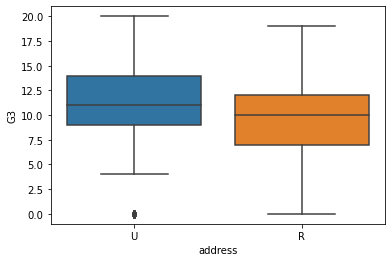

In [5]:
#create the boxplot here:
sns.boxplot(data = students, x = 'address', y = 'G3')
plt.show()

#### Inspecting Overlapping Histograms
Another way to explore the relationship between a quantitative and categorical variable in more detail is by inspecting overlapping histograms. In the code below, setting alpha = .5 ensures that the histograms are see-through enough that we can see both of them at once. We have also used normed=True make sure that the y-axis is a density rather than a frequency (note: the newest version of matplotlib renamed this parameter density instead of normed):

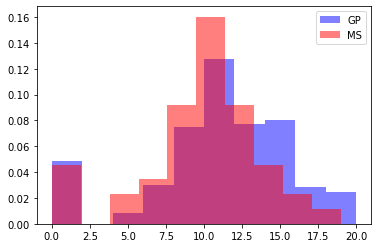

In [6]:
scores_GP = students[students['school'] == 'GP']['G3']
scores_MS = students[students['school'] == 'MS']['G3']

plt.hist(scores_GP , color="blue", label="GP", density = True, alpha=0.5)
plt.hist(scores_MS , color="red", label="MS", density = True, alpha=0.5)
plt.legend()
plt.show()

By inspecting this histogram, we can clearly see that the entire distribution of scores at GP (not just the mean or median) appears slightly shifted to the right (higher) compared to the scores at MS. However, there is also still a lot of overlap between the scores, suggesting that the association is relatively weak.

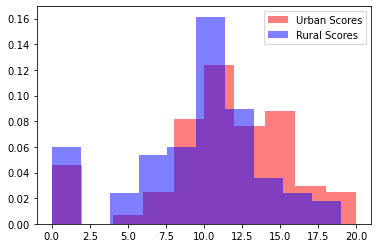

In [7]:
#create the overlapping histograms here:
plt.hist(scores_urban, alpha = 0.5, density = True, color = 'red', label = 'Urban Scores')
plt.hist(scores_rural, alpha = 0.5, density = True, color = 'blue', label = 'Rural Scores')
plt.legend()
plt.show()

#### Exploring Non-Binary Categorical Variables

In each of the previous exercises, we assessed whether there was an association between a quantitative variable (math scores) and a BINARY categorical variable (school). The categorical variable is considered binary because there are only two available options, either MS or GP. However, sometimes we are interested in an association between a quantitative variable and non-binary categorical variable. Non-binary categorical variables have more than two categories.

When looking at an association between a quantitative variable and a non-binary categorical variable, we must examine all pair-wise differences. For example, suppose we want to know whether or not an association exists between math scores (G3) and (Mjob), a categorical variable representing the mother’s job. This variable has five possible categories: `at_home`, `health`, `services`, `teacher`, or `other`. There are actually 10 different comparisons that we can make. For example, we can compare scores for students whose mothers work at_home or in `health; at_home or other; at home or `services; etc.. The easiest way to quickly visualize these comparisons is with side-by-side box plots:

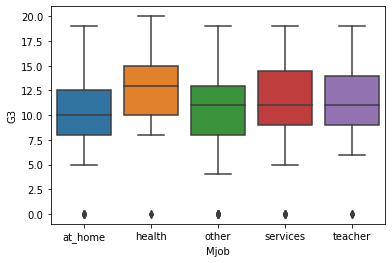

In [8]:
sns.boxplot(data = students, x = 'Mjob', y = 'G3')
plt.show()

Visually, we need to compare each box to every other box. While most of these boxes overlap with each other, there are some pairs for which there are some apparent differences. For example, scores appear to be higher among students with mothers working in health than among students with mothers working at home or in an “other” job. If there are ANY pairwise differences, we can say that the variables are associated; however, it is more useful to specifically report which groups are different.

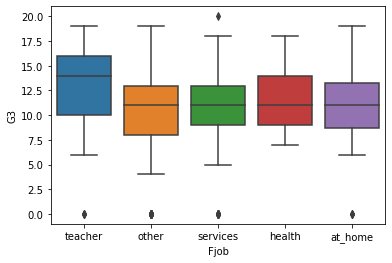

In [9]:
sns.boxplot(data = students, y = 'G3', x = 'Fjob')
plt.show()


#### Associations in the titanic data

In [10]:
titanic = pd.read_csv('../Datasets/titanic.csv')
#Mean fare paid by survivors
fare_survivors = titanic[titanic['Survived'] == 1]['Fare']
mean_fare_survivors = np.mean(fare_survivors)
print('Average fare paid by survivors is {}'.format(mean_fare_survivors))

#Mean fare paid by nonsurvivors
fare_dead_victims = titanic[titanic['Survived'] == 0]['Fare']
mean_fare_dead_victims = np.mean(fare_dead_victims)
print('Average fare paid by non-survivors is {}'.format(mean_fare_dead_victims))


diff_means = mean_fare_survivors - mean_fare_dead_victims
print('Difference in means: {}'.format(diff_means))

Average fare paid by survivors is 37.80299847560977
Average fare paid by non-survivors is 19.7208009208103
Difference in means: 18.082197554799468


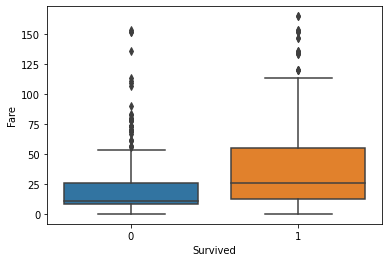

In [11]:
sns.boxplot(data = titanic, x = 'Survived', y = 'Fare')
plt.show()

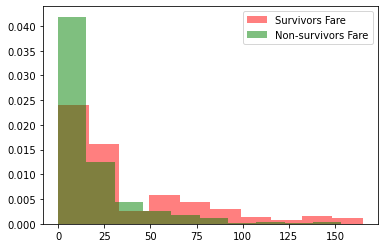

In [12]:
#Overlapping Histograms
plt.hist(fare_survivors, alpha = 0.5, density = True, color = 'red', label = 'Survivors Fare')
plt.hist(fare_dead_victims, alpha = 0.5, density = True, color = 'green', label = 'Non-survivors Fare' )
plt.legend()
plt.show()

#### Associations Two Quantitative Variables
When associations exist between variables, it means that information about the value of one variable gives us information about the value of the other variable.
We'll examine some data about Texas housing rentals on Craigslist — an online classifieds site. The data dictionary is as follows:

- `price`: monthly rental price in U.S.D.
- `type`: type of housing (eg., 'apartment', 'house', 'condo', etc.)
- `sqfeet`: housing area, in square feet
- `beds`: number of beds
- `baths`: number of baths
- `lat`: latitude
- `long`: longitude

Except for type, all of these variables are quantitative. Which pairs of variables do you think might be associated? For example, does knowing something about price give you any information about square footage?

In [13]:
housing = pd.read_csv('../Datasets/housing.csv')

#print the first 10 rows of data:
print(housing.head(10))

   price       type  sqfeet  beds  baths      lat      long
0    615  apartment     364     0    1.0  35.1653 -101.8840
1   1346  apartment     816     1    1.0  32.9865  -96.6860
2    900  apartment     500     1    1.0  30.2355  -97.7292
3    650  apartment     700     1    1.0  26.1923  -98.2657
4   1330  apartment    1040     2    2.0  30.6380  -96.2940
5    915  apartment     620     1    1.0  29.8754  -97.9404
6   1600      house    1578     3    2.0  32.6412  -97.1058
7    349  apartment     275     0    1.0  33.5865 -101.8610
8    695      house     650     1    1.0  31.5525  -97.1604
9    889  apartment     650     1    1.5  29.8754  -97.9404


#### Scatter Plots
One of the best ways to quickly visualize the relationship between quantitative variables is to plot them against each other in a scatter plot. This makes it easy to look for patterns or trends in the data. Let’s start by plotting the area of a rental against it’s monthly price to see if we can spot any patterns.

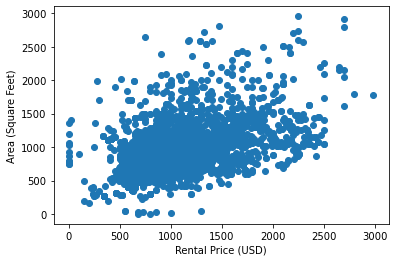

In [14]:
plt.scatter(x = housing.price, y = housing.sqfeet)
plt.xlabel('Rental Price (USD)')
plt.ylabel('Area (Square Feet)')
plt.show()

While there’s a lot of variation in the data, it seems like more expensive housing tends to come with slightly more space. This suggests an association between these two variables.

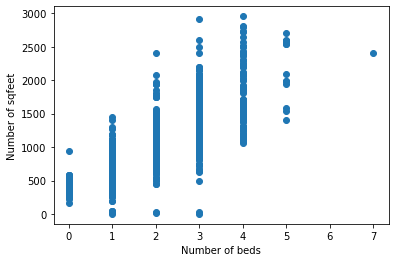

In [15]:
plt.scatter(x = housing['beds'], y = housing['sqfeet'])
plt.xlabel('Number of beds')
plt.ylabel('Number of sqfeet')
plt.show()

In [16]:
# calculate and print covariance matrix:
cov_mat_sqfeet_beds = np.cov(housing['sqfeet'], housing['beds'])
print(cov_mat_sqfeet_beds)

# store the covariance as cov_sqfeet_beds
cov_sqfeet_beds = cov_mat_sqfeet_beds[0][1]
print(cov_sqfeet_beds)

[[1.10668978e+05 2.28223306e+02]
 [2.28223306e+02 7.24471949e-01]]
228.2233061940595


#### Correlation
Like covariance, Pearson Correlation (often referred to simply as “correlation”) is a scaled form of covariance. It also measures the strength of a linear relationship, but ranges from -1 to +1, making it more interpretable.

Highly associated variables with a positive linear relationship will have a correlation close to 1. Highly associated variables with a negative linear relationship will have a correlation close to -1. Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.

In [17]:
from scipy.stats import pearsonr
# calculate corr_sqfeet_beds and print it out:
corr_sqfeet_beds, p = pearsonr(housing.sqfeet, housing.beds)
print(corr_sqfeet_beds)

0.8060022524416222


Generally, a correlation larger than about .3 indicates a linear association. A correlation greater than about .6 suggestions a strong linear association.

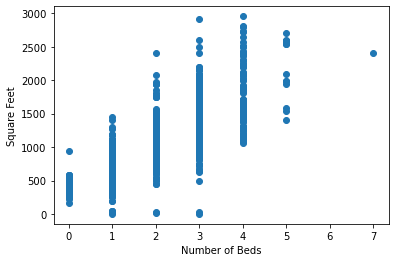

In [18]:
# create the scatter plot here:
plt.scatter(data = housing, x = 'beds', y = 'sqfeet')
plt.xlabel('Number of Beds')
plt.ylabel('Square Feet')
plt.show()

It’s important to note that there are some limitations to using correlation or covariance as a way of assessing whether there is an association between two variables. Because correlation and covariance both measure the strength of linear relationships with non-zero slopes, but not other kinds of relationships, correlation can be misleading.

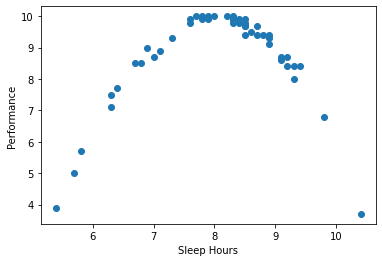

0.2814978189049413


In [19]:
sleep = pd.read_csv('../Datasets/sleep_performance.csv')

# create your scatter plot here:
plt.scatter(sleep['hours_sleep'], sleep['performance'])
plt.xlabel('Sleep Hours')
plt.ylabel('Performance')
plt.show()

# calculate the correlation for `hours_sleep` and `performance`:
corr_sleep_performance, p = pearsonr(sleep['hours_sleep'], sleep['performance'])
print(corr_sleep_performance)

The correlation is only 0.28 (a relatively small correlation), even though the variables seem to be clearly associated (there is a very clear pattern in the scatter plot).

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie            39.1           18.7              181.0       3750.0   
1  Adelie            39.5           17.4              186.0       3800.0   
2  Adelie            40.3           18.0              195.0       3250.0   

      sex  
0    male  
1  female  
2  female  


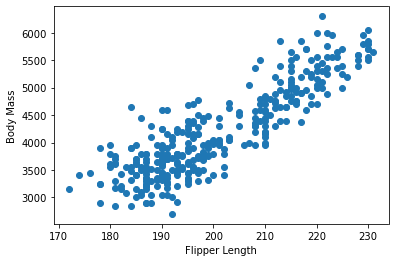

Covariance: 9852.191649480805
Correlation: 0.8729788985653613


In [20]:
penguins = pd.read_csv('../Datasets/penguins.csv')
print(penguins.head(3))

flipper_length = penguins['flipper_length_mm']
body_mass = penguins['body_mass_g']
plt.scatter(flipper_length, body_mass)
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')
plt.show()

cov_flipper_body = np.cov(flipper_length, body_mass)
#print(cov_flipper_body)
print('Covariance:', cov_flipper_body[0][1])

corr_flipper_body, p = pearsonr(flipper_length, body_mass)
print('Correlation:', corr_flipper_body)

#### Associations between 2 categorical variables
As an example, we’ll explore a sample of data from the Narcissistic Personality Inventory (NPI-40), a personality test with 40 questions about personal preferences and self-view. There are two possible responses to each question. The sample we’ll be working with contains responses to the following:

- influence: yes = I have a natural talent for influencing people; no = I am not good at influencing people.
- blend_in: yes = I prefer to blend in with the crowd; no = I like to be the center of attention.
- special: yes = I think I am a special person; no = I am no better or worse than most people.
- leader: yes = I see myself as a good leader; no = I am not sure if I would make a good leader.
- authority: yes = I like to have authority over other people; no = I don’t mind following orders.

As you might guess, responses to some of these questions are associated. For example, if we know whether someone views themself as a good leader, we may also find that they’re more likely to like having authority. I

In [21]:
npi = pd.read_csv('../Datasets/npi_sample.csv')
print(npi.head())

  influence blend_in special leader authority
0        no      yes     yes    yes       yes
1        no      yes      no     no        no
2       yes       no     yes    yes       yes
3       yes       no      no    yes       yes
4       yes      yes      no    yes        no


##### Contingency Tables: Frequencies
Contingency tables, also known as two-way tables or cross-tabulations, are useful for summarizing two variables at the same time. For example, suppose we are interested in understanding whether there is an association between influence (whether a person thinks they have a talent for influencing people) and leader (whether they see themself as a leader). We can use the crosstab function from pandas to create a contingency table:

In [22]:
influence_leader_freq = pd.crosstab(npi.influence, npi.leader)
print(influence_leader_freq)

leader       no   yes
influence            
no         3015  1293
yes        2360  4429


This table tells us the number of people who gave each possible combination of responses to these two questions. For example, 2360 people said that they do not see themselves as a leader but have a talent for influencing people.

To assess whether there is an association between these two variables, we need to ask whether information about one variable gives us information about the other. In this example, we see that among people who don’t see themselves as a leader (the first column), a larger number (3015) don’t think they have a talent for influencing people. Meanwhile, among people who do see themselves as a leader (the second column), a larger number (4429) do think they have a talent for influencing people.

So, if we know how someone responded to the leadership question, we have some information about how they are likely to respond to the influence question. This suggests that the variables are associated.

In [23]:
special_authority_freq = pd.crosstab(npi.special, npi.authority)
print(special_authority_freq)

authority    no   yes
special              
no         4069  1905
yes        2229  2894


sometimes it’s helpful to convert those frequencies to proportions. We can accomplish this simply by dividing the all the frequencies in a contingency table by the total number of observations (the sum of the frequencies):

In [24]:
influence_leader_freq = pd.crosstab(npi.influence, npi.leader)
influence_leader_prop = influence_leader_freq/len(npi)
print(influence_leader_prop)

leader           no       yes
influence                    
no         0.271695  0.116518
yes        0.212670  0.399117


The resulting contingency table makes it slightly easier to compare the proportion of people in each category. For example, we see that the two largest proportions in the table (.399 and .271) are in the yes/yes and no/no cells of the table. We can also see that almost 40% of the surveyed population (by far the largest proportion) both see themselves as leaders and think they have a talent for influencing people.

##### Marginal Proportions

In [25]:
# save the table of proportions as special_authority_prop:
special_authority_prop = special_authority_freq/len(npi)

# calculate and print authority_marginals
authority_marginals = special_authority_prop.sum(axis = 0)
print(authority_marginals)

# calculate and print special_marginals
special_marginals = special_authority_prop.sum(axis  = 1)
print(special_marginals)

authority
no     0.567541
yes    0.432459
dtype: float64
special
no     0.538344
yes    0.461656
dtype: float64


##### Expected Contingency tables
In order to understand whether these questions are associated, we can use the marginal proportions to create a contingency table of expected proportions if there were no association between these variables. To calculate these expected proportions, we need to multiply the marginal proportions for each combination of categories.

In [28]:
from scipy.stats import chi2_contingency
special_authority_freq = pd.crosstab(npi.special, npi.authority)
print("observed contingency table:")
print(special_authority_freq)

# calculate the expected contingency table if there's no association and save it as expected
chi2, pval, dof, expected = chi2_contingency(special_authority_freq)

# print out the expected frequency table
print("expected contingency table (no association):\n", np.round(expected))

observed contingency table:
authority    no   yes
special              
no         4069  1905
yes        2229  2894
expected contingency table (no association):
 [[3390. 2584.]
 [2908. 2215.]]


The more that the expected and observed tables differ, the more sure we can be that the variables are associated. In this example, we see some pretty big differences (eg., 4069 in the observed table compared to 3390 in the expected table). This provides additional evidence that these variables are associated.

##### The Chi-Square Statistic
In the previous cells, we calculated a contingency table of expected frequencies if there were no association between the leader and influence questions. We then compared this to the observed contingency table. Because the tables looked somewhat different, we concluded that responses to these questions are probably associated.

While we can inspect these tables visually, many data scientists use the Chi-Square statistic to summarize how different these two tables are. To calculate the Chi Square statistic, we simply find the squared difference between each value in the observed table and its’ corresponding value in the expected table; then add up those numbers:
$ChiSquare=sum((observed−expected)^2)$

In [29]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(influence_leader_freq)
print(chi2)

1307.8836807573769


The interpretation of the Chi-Square statistic is dependent on the size of the contingency table. For a 2x2 table (like the one we’ve been investigating), a Chi-Square statistic larger than around 4 would strongly suggest an association between the variables. In this example, our Chi-Square statistic is much larger than that — 1307.88! This adds to our evidence that the variables are highly associated.

In [30]:
special_authority_freq = pd.crosstab(npi.special, npi.authority)

# calculate the chi squared statistic and save it as chi2, then print it:
chi2, pval, dof, expected = chi2_contingency(special_authority_freq)
chi2 = chi2
print(chi2)

679.1219526170606


In [31]:
#Frequency table for authority and blend_in
blend_in_authority = pd.crosstab(npi['blend_in'], npi['authority'])
print(blend_in_authority)

authority    no   yes
blend_in             
no         1308  2091
yes        4990  2708


In [32]:
#Proportions
blend_in_authority_prop = blend_in_authority/len(npi)
print(blend_in_authority_prop)

authority        no       yes
blend_in                     
no         0.117870  0.188429
yes        0.449671  0.244030


In [34]:
#Marginal Proportions
blend_in_marginals = blend_in_authority_prop.sum(axis = 1)
print(blend_in_marginals)
print('')
authority_marginals = blend_in_authority_prop.sum(axis = 0)
print(authority_marginals)

blend_in
no     0.306299
yes    0.693701
dtype: float64

authority
no     0.567541
yes    0.432459
dtype: float64


In [35]:
#Expected contingency table
chi2, pval, dof, expected = chi2_contingency(blend_in_authority)
print(expected)

[[1929.0711003 1469.9288997]
 [4368.9288997 3329.0711003]]
